ここでは1次元ハイゼンベルグ模型
$$H = \sum_{i} J_{i} (X_iX_{i+1} + Y_iY_{1+1} + Z_iZ_{i+1})$$
を考える

エネルギー期待値は 
$$\langle H \rangle = \langle H_{XX} \rangle + \langle H_{YY} \rangle + \langle H_{ZZ} \rangle $$
で求められます。

For simplicity, we consider only two sites and set $J_{1,2} = 0.5$. The Hamiltonian is now given by
$$H = \frac{1}{2} (X_1 X_2 + X_2 X_1 + Y_1 Y_2 + Y_2 Y_1 + Z_1 Z_2 + Z_2 Z_1)$$

Since we do the sampling in the Z basis, we need to be careful in the case of $XX$ and $YY$.

For example,
$$\bra{\psi}X_1 X_2\ket{\psi} = \bra{\psi}H_1 Z_1 H_1 H_2 Z_2 H_2\ket{\psi} = \bra{\psi}H_1 H_2 Z_1 Z_2 H_1 H_2\ket{\psi} = \bra{\psi^{\prime}}Z_1 Z_2\ket{\psi^{\prime}}$$

This means that for the sampling of $XX$, we need to first transform the state $\ket{\psi}$ into $\Pi_{i} H_i \ket{\psi}$.

We will use a uniformly distributed state
$$\ket{\psi} = \frac{1}{2} (\ket{00}+ \ket{01} + \ket{10} + \ket{11})$$

After the transformation, it becomes
$$\ket{\psi^{\prime}} = \ket{00}$$

This corresponds to the $\ket{++}$ state in the $X$ basis.

In [2]:
from qulacs import Observable, QuantumState, QuantumCircuit
from qulacsvis import circuit_drawer
import numpy as np
import matplotlib.pyplot as plt
from utility import *

In [3]:
nqubits = 2

In [4]:
hamiltonian = Observable(nqubits)
#np.random.seed(1)
#J_list = 2*np.random.rand(nqubits)-1
J_list = np.array([0.5,0.5])
print(J_list)

[0.5 0.5]


In [5]:
for i in range(nqubits):
    hamiltonian.add_operator(J_list[i], f"X {i} X {(i+1)%nqubits}")
    hamiltonian.add_operator(J_list[i], f"Y {i} Y {(i+1)%nqubits}")
    hamiltonian.add_operator(J_list[i], f"Z {i} Z {(i+1)%nqubits}")

In [6]:
from qulacs.gate import H, S, Sdag

In [7]:
state = QuantumState(nqubits)
circuit = QuantumCircuit(nqubits)

for i in range(nqubits):
    circuit.add_gate(H(i))

circuit.update_quantum_state(state)

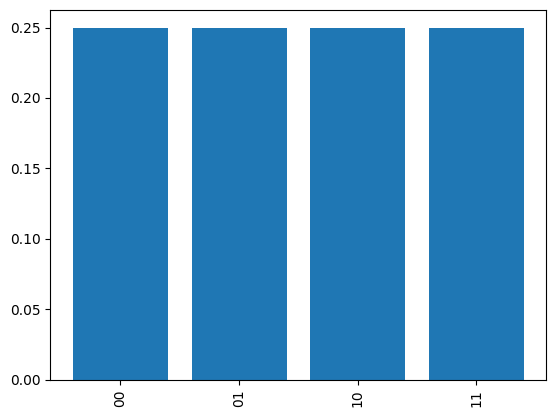

In [8]:
show_distribution(state)

In [9]:
hamiltonian.get_expectation_value(state)

0.9999999999999996

In [10]:
hamiltonian_ZZ = Observable(nqubits)
for i in range(nqubits):
    hamiltonian_ZZ.add_operator(J_list[i], f"Z {i} Z {(i+1)%nqubits}")

In [11]:
hamiltonian_ZZ.get_expectation_value(state)

0.0

In [12]:
hamiltonian_XX = Observable(nqubits)
for i in range(nqubits):
    hamiltonian_XX.add_operator(J_list[i], f"X {i} X {(i+1)%nqubits}")

In [13]:
hamiltonian_XX.get_expectation_value(state)

0.9999999999999996

In [14]:
hamiltonian_YY = Observable(nqubits)
for i in range(nqubits):
    hamiltonian_YY.add_operator(J_list[i], f"Y {i} Y {(i+1)%nqubits}")

In [15]:
hamiltonian_YY.get_expectation_value(state)

0.0

In [16]:
def sample_ZZ(_n_shots):
    global J_list, state
    samples = state.sampling(_n_shots)
    #print(samples)
    estimated_Z_energy = 0
    mask_list = [0b11, 0b11]
    for s in samples:
        for J, mask in zip(J_list, mask_list):
            bitcount = bin(s & mask).count("1")
            #print(f"{s:04b}, {bitcount}, {mask:04b}")
            estimated_Z_energy += J*(-1)**bitcount/_n_shots
    return estimated_Z_energy

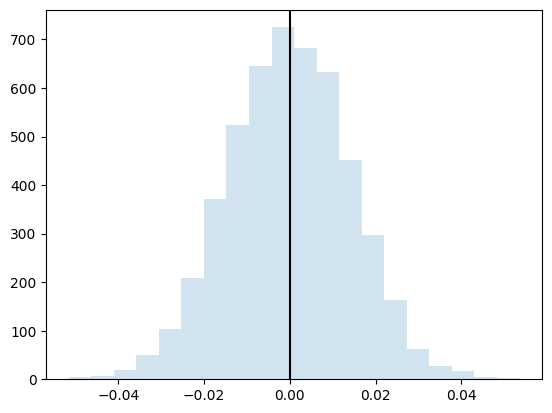

In [17]:
n_test = 5000
n_shots = 5000
result_list_ZZ = np.zeros(n_test)
for i in range(n_test):
    result_list_ZZ[i] = sample_ZZ(n_shots)
plt.hist(result_list_ZZ, alpha=0.2, bins=20)
hamiltonian_ZZ = Observable(nqubits)
for i in range(nqubits):
    hamiltonian_ZZ.add_operator(J_list[i], f"Z {i} Z {(i+1)%nqubits}")
plt.axvline(hamiltonian_ZZ.get_expectation_value(state), color="black")
plt.show()

In [18]:
state_X = state.copy()
for i in range(nqubits):
    H(i).update_quantum_state(state_X)

print(state_X.get_vector())

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [19]:
def sample_XX(_n_shots):
    global J_list

    samples = state_X.sampling(_n_shots)
    #print(samples)
    estimated_X_energy = 0
    mask_list = [0b11, 0b11]
    for s in samples:
        for J, mask in zip(J_list, mask_list):
            bitcount = bin(s & mask).count("1")
            #print(f"{s:04b}, {bitcount}, {mask:04b}")
            estimated_X_energy += J*(-1)**bitcount/_n_shots
    return estimated_X_energy

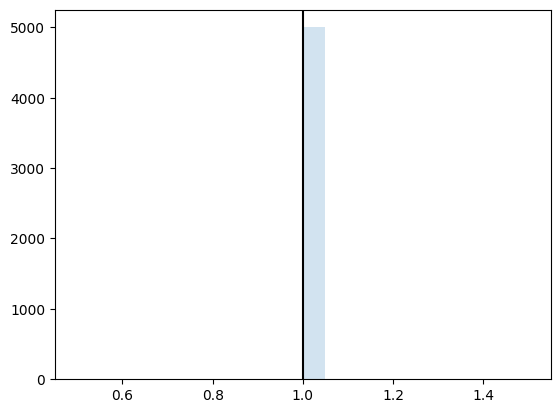

In [20]:
n_test = 5000
n_shots = 5000
result_list_XX = np.zeros(n_test)
for i in range(n_test):
    result_list_XX[i] = sample_XX(n_shots)
plt.hist(result_list_XX, alpha=0.2, bins=20)
hamiltonian_XX = Observable(nqubits)
for i in range(nqubits):
    hamiltonian_XX.add_operator(J_list[i], f"X {i} X {(i+1)%nqubits}")
plt.axvline(hamiltonian_XX.get_expectation_value(state), color="black")
plt.show()

In [21]:
state_Y = state.copy()
for i in range(nqubits):
    Sdag(i).update_quantum_state(state_Y)
    H(i).update_quantum_state(state_Y)

print(state_Y.get_vector())

[0. -0.5j 0.5+0.j  0.5+0.j  0. +0.5j]


In [22]:
def sample_YY(_n_shots):
    global J_list, state
    
    samples = state_Y.sampling(_n_shots)
    #print(samples)
    estimated_Y_energy = 0
    mask_list = [0b0011, 0b0110, 0b1100, 0b1001]
    for s in samples:
        for J, mask in zip(J_list, mask_list):
            bitcount = bin(s & mask).count("1")
            #print(f"{s:04b}, {bitcount}, {mask:04b}")
            estimated_Y_energy += J*(-1)**bitcount/_n_shots
    return estimated_Y_energy

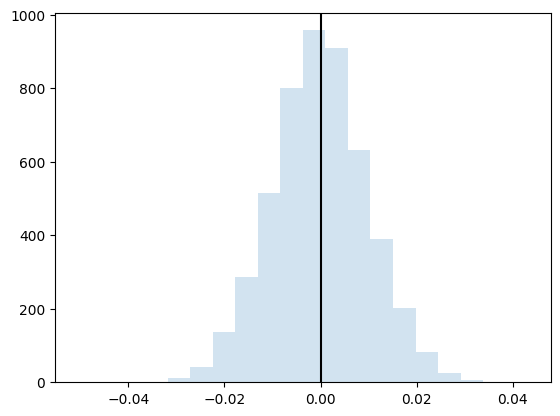

In [23]:
n_test = 5000
n_shots = 5000
result_list_YY = np.zeros(n_test)
for i in range(n_test):
    result_list_YY[i] = sample_YY(n_shots)
plt.hist(result_list_YY, alpha=0.2, bins=20)
hamiltonian_YY = Observable(nqubits)
for i in range(nqubits):
    hamiltonian_YY.add_operator(J_list[i], f"Y {i} Y {(i+1)%nqubits}")
plt.axvline(hamiltonian_YY.get_expectation_value(state), color="black")
plt.show()

5000


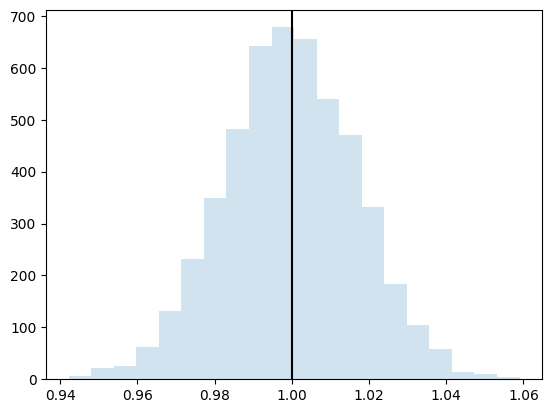

In [24]:
result_list_total = result_list_XX + result_list_YY + result_list_ZZ
print(len(result_list_total))
plt.hist(result_list_total, alpha=0.2, bins=20)
plt.axvline(hamiltonian.get_expectation_value(state), color="black")
plt.show()